In [25]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# import ipywidgets as widgets
import math as mt

In [2]:
contrail = xr.open_dataset("sample_data/f100___________20171202_0000_contrail_gp.nc")
contrail

<xarray.Dataset>
Dimensions:    (time: 30, lon: 128, lev: 31, lat: 64, tbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon        (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lev        (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * lat        (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: tbnds
Data variables:
    YYYYMMDD   (time) float64 ...
    dt         (time) float64 ...
    nstep      (time) float64 ...
    hyam       (lev) float32 ...
    hybm       (lev) float32 ...
    b_cc       (time, lev, lat, lon) float32 ...
    potcov     (time, lev, lat, lon) float32 ...
    qsm1       (time, lev, lat, lon) float32 ...
    aps        (time, lat, lon) float32 ...
    time_bnds  (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             contrail_gp
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_contrail_gp.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [3]:
accf = xr.open_dataset("sample_data/f100___________20171202_0000_accf_gp.nc")
accf

<xarray.Dataset>
Dimensions:         (time: 30, lon: 128, lev: 31, lat: 64, tbnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon             (lon) float32 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lev             (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0
  * lat             (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: tbnds
Data variables:
    YYYYMMDD        (time) float64 ...
    dt              (time) float64 ...
    nstep           (time) float64 ...
    hyam            (lev) float32 ...
    hybm            (lev) float32 ...
    atr20_o3        (time, lev, lat, lon) float32 ...
    atr20_ch4       (time, lev, lat, lon) float32 ...
    atr20_h2o       (time, lev, lat, lon) float32 ...
    atr20_contrail  (time, lev, lat, lon) float32 ...
    atr20_co2       (time, lev, lat, lon) float32 ...
    aps             (time, lat, lon) float32 ...
    time_bnds       (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             accf_gp
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_accf_gp.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [4]:
contr_atr20_perkm = contrail['potcov']*accf['atr20_contrail']

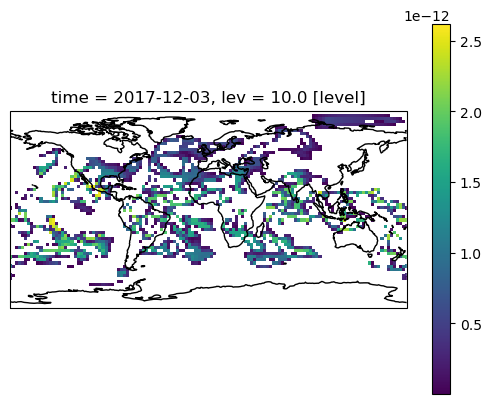

In [20]:
var = contr_atr20_perkm.isel(time=1).sel(lev=10.0)
var = var.where(var > 1e-20)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines()

# extent = [-25, 60, 20, 70]
# ax.set_extent(extent)

p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)

In [23]:
echam = xr.open_dataset('sample_data/f100___________20171202_0000_ECHAM5.nc')
echam

<xarray.Dataset>
Dimensions:      (time: 30, lon: 128, lat: 64, lev: 31, ilev: 32, tbnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon          (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat          (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lev          (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * ilev         (ilev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0 32.0
Dimensions without coordinates: tbnds
Data variables: (12/85)
    YYYYMMDD     (time) float64 ...
    dt           (time) float64 ...
    nstep        (time) float64 ...
    hyam         (lev) float32 ...
    hybm         (lev) float32 ...
    hyai         (ilev) float32 ...
    ...           ...
    sigmadot     (time, ilev, lat, lon) float32 ...
    tke          (time, lev, lat, lon) float32 ...
    ocu          (time, lat, lon) float32 ...
    ocv          (time, lat, lon) float32 ...
    aps          (time, lat, lon) float32 ...
    time_bnds    (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             ECHAM5
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_ECHAM5.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [41]:
gamma = 1.4
R_air = 287.05
M = 0.8

speed = M * np.sqrt(gamma * R_air * echam['tm1'])
# speed.rename('speed')
speed

<xarray.DataArray 'tm1' (time: 30, lev: 31, lat: 64, lon: 128)>
array([[[[282.14706, 282.13934, 282.13403, ..., 282.18457, 282.16968,
          282.15717],
         [280.91266, 280.90353, 280.9    , ..., 280.97433, 280.94803,
          280.92746],
         [279.6955 , 279.69812, 279.71075, ..., 279.75024, 279.72134,
          279.70316],
         ...,
         [315.63742, 315.6145 , 315.5912 , ..., 315.71005, 315.6845 ,
          315.66052],
         [315.85703, 315.83456, 315.81302, ..., 315.9318 , 315.90546,
          315.8806 ],
         [316.08945, 316.07535, 316.0618 , ..., 316.13492, 316.11926,
          316.10406]],

        [[282.66727, 282.64603, 282.62735, ..., 282.7459 , 282.71732,
          282.69107],
         [281.35867, 281.30698, 281.26175, ..., 281.55167, 281.48114,
          281.41678],
         [280.04178, 279.96765, 279.90488, ..., 280.33347, 280.2247 ,
          280.12747],
...
         [320.84604, 320.62033, 320.41418, ..., 321.70828, 321.3849 ,
          321.09888],
         [319.59167, 319.4314 , 319.27673, ..., 320.1204 , 319.93518,
          319.7592 ],
         [317.0329 , 316.98502, 316.93756, ..., 317.1773 , 317.12924,
          317.08102]],

        [[319.077  , 319.1256 , 319.17795, ..., 318.95782, 318.99268,
          319.03253],
         [316.96982, 317.19003, 317.40784, ..., 316.3039 , 316.52533,
          316.7479 ],
         [318.98   , 319.25494, 319.4653 , ..., 317.70807, 318.20834,
          318.6325 ],
         ...,
         [320.07834, 319.8478 , 319.618  , ..., 320.86417, 320.57867,
          320.3191 ],
         [318.70435, 318.51712, 318.33215, ..., 319.29025, 319.09003,
          318.89496],
         [316.2942 , 316.24493, 316.19785, ..., 316.45294, 316.39847,
          316.3455 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float32 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0

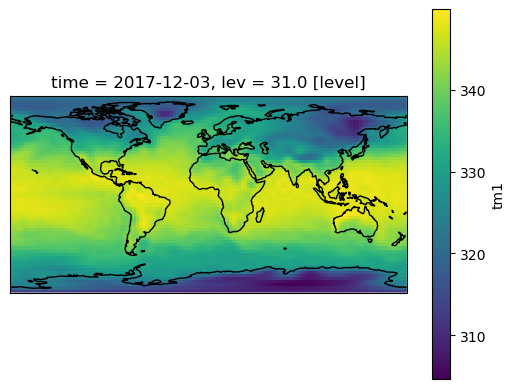

In [42]:
var = speed.isel(time=1).sel(lev=31.0)
var = var.where(var > 1e-20)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines()

# extent = [-25, 60, 20, 70]
# ax.set_extent(extent)

p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)

In [43]:
fuel_persec = 41.7 #kg/s
co2_atr20_perkm = accf['atr20_co2'] * fuel_persec / speed
co2_atr20_perkm

<xarray.DataArray (time: 30, lev: 31, lat: 64, lon: 128)>
array([[[[1.0359561e-15, 1.0359845e-15, 1.0360040e-15, ...,
          1.0358185e-15, 1.0358731e-15, 1.0359191e-15],
         [1.0405084e-15, 1.0405422e-15, 1.0405553e-15, ...,
          1.0402800e-15, 1.0403774e-15, 1.0404536e-15],
         [1.0450364e-15, 1.0450267e-15, 1.0449795e-15, ...,
          1.0448320e-15, 1.0449399e-15, 1.0450078e-15],
         ...,
         [9.2603719e-16, 9.2610443e-16, 9.2617282e-16, ...,
          9.2582416e-16, 9.2589902e-16, 9.2596943e-16],
         [9.2539334e-16, 9.2545920e-16, 9.2552230e-16, ...,
          9.2517438e-16, 9.2525146e-16, 9.2532420e-16],
         [9.2471286e-16, 9.2475415e-16, 9.2479375e-16, ...,
          9.2457987e-16, 9.2462572e-16, 9.2467008e-16]],

        [[1.0340497e-15, 1.0341274e-15, 1.0341957e-15, ...,
          1.0337620e-15, 1.0338666e-15, 1.0339625e-15],
         [1.0388590e-15, 1.0390499e-15, 1.0392170e-15, ...,
          1.0381469e-15, 1.0384070e-15, 1.0386445e-15],
         [1.0437442e-15, 1.0440206e-15, 1.0442547e-15, ...,
          1.0426582e-15, 1.0430629e-15, 1.0434249e-15],
...
         [9.1100384e-16, 9.1164526e-16, 9.1223172e-16, ...,
          9.0856216e-16, 9.0947643e-16, 9.1028651e-16],
         [9.1457948e-16, 9.1503836e-16, 9.1548168e-16, ...,
          9.1306891e-16, 9.1359756e-16, 9.1410038e-16],
         [9.2196106e-16, 9.2210029e-16, 9.2223836e-16, ...,
          9.2154135e-16, 9.2168101e-16, 9.2182109e-16]],

        [[9.1605470e-16, 9.1591515e-16, 9.1576501e-16, ...,
          9.1639700e-16, 9.1629684e-16, 9.1618239e-16],
         [9.2214455e-16, 9.2150430e-16, 9.2087199e-16, ...,
          9.2408595e-16, 9.2343945e-16, 9.2279062e-16],
         [9.1633327e-16, 9.1554415e-16, 9.1494127e-16, ...,
          9.2000177e-16, 9.1855535e-16, 9.1733255e-16],
         ...,
         [9.1318887e-16, 9.1384712e-16, 9.1450410e-16, ...,
          9.1095238e-16, 9.1176363e-16, 9.1250256e-16],
         [9.1712588e-16, 9.1766491e-16, 9.1819811e-16, ...,
          9.1544293e-16, 9.1601732e-16, 9.1657763e-16],
         [9.2411432e-16, 9.2425821e-16, 9.2439585e-16, ...,
          9.2365068e-16, 9.2380971e-16, 9.2396450e-16]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0
  * lat      (lat) float32 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86

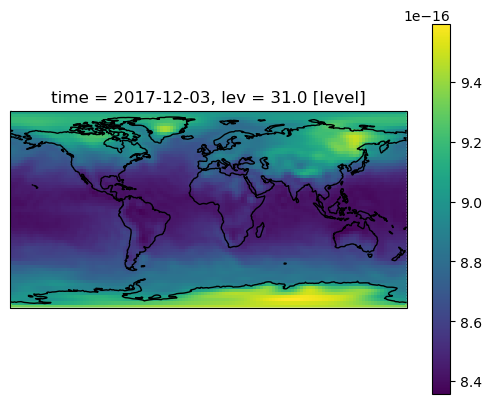

In [44]:
var = co2_atr20_perkm.isel(time=1).sel(lev=31.0)
var = var.where(var > 1e-20)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines()

# extent = [-25, 60, 20, 70]
# ax.set_extent(extent)

p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)

In [48]:
fuel_persec = 41.7 #kg/s
h2o_atr20_perkm = accf['atr20_h2o'] * fuel_persec / speed * 1000
h2o_atr20_perkm

<xarray.DataArray (time: 30, lev: 31, lat: 64, lon: 128)>
array([[[[2.99285445e-13, 2.99293603e-13, 2.99299241e-13, ...,
          2.99245654e-13, 2.99261429e-13, 2.99274711e-13],
         [3.00600555e-13, 3.00610312e-13, 3.00614107e-13, ...,
          3.00534581e-13, 3.00562716e-13, 3.00584725e-13],
         [3.01908699e-13, 3.01905853e-13, 3.01892219e-13, ...,
          3.01849610e-13, 3.01880808e-13, 3.01900432e-13],
         ...,
         [2.67530084e-13, 2.67549492e-13, 2.67569251e-13, ...,
          2.67468529e-13, 2.67490186e-13, 2.67510515e-13],
         [2.67344090e-13, 2.67363090e-13, 2.67381332e-13, ...,
          2.67280799e-13, 2.67303080e-13, 2.67324113e-13],
         [2.67147497e-13, 2.67159396e-13, 2.67170861e-13, ...,
          2.67109062e-13, 2.67122289e-13, 2.67135137e-13]],

        [[1.09120265e-11, 1.09219378e-11, 1.09312429e-11, ...,
          1.08789913e-11, 1.08905159e-11, 1.09015392e-11],
         [1.11447752e-11, 1.11704517e-11, 1.11954968e-11, ...,
          1.10651436e-11, 1.10920171e-11, 1.11185922e-11],
         [1.11785954e-11, 1.12241882e-11, 1.12708783e-11, ...,
          1.10517324e-11, 1.10920986e-11, 1.11344623e-11],
...
          2.62481578e-13, 2.62745717e-13, 2.62979742e-13],
         [2.64219961e-13, 2.64352559e-13, 2.64480603e-13, ...,
          2.63783570e-13, 2.63936280e-13, 2.64081563e-13],
         [2.66352505e-13, 2.66392729e-13, 2.66432628e-13, ...,
          2.66231210e-13, 2.66271597e-13, 2.66312065e-13]],

        [[2.64646161e-13, 2.64605829e-13, 2.64562460e-13, ...,
          2.64745040e-13, 2.64716119e-13, 2.64683051e-13],
         [2.66405496e-13, 2.66220558e-13, 2.66037843e-13, ...,
          2.66966354e-13, 2.66779627e-13, 2.66592168e-13],
         [2.64726609e-13, 2.64498655e-13, 2.64324505e-13, ...,
          2.65786471e-13, 2.65368592e-13, 2.65015359e-13],
         ...,
         [2.63818237e-13, 2.64008379e-13, 2.64198196e-13, ...,
          2.63172134e-13, 2.63406484e-13, 2.63619936e-13],
         [2.64955619e-13, 2.65111365e-13, 2.65265376e-13, ...,
          2.64469409e-13, 2.64635346e-13, 2.64797244e-13],
         [2.66974566e-13, 2.67016146e-13, 2.67055909e-13, ...,
          2.66840640e-13, 2.66886583e-13, 2.66931252e-13]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0
  * lat      (lat) float32 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86

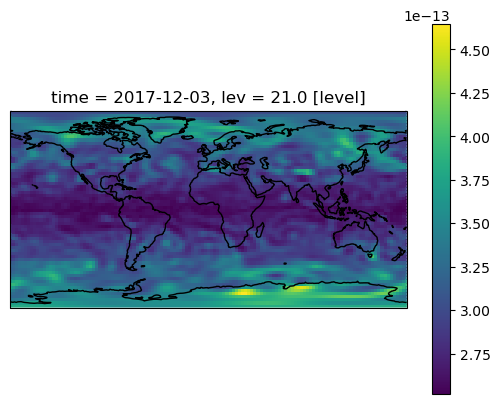

In [49]:
var = h2o_atr20_perkm.isel(time=1).sel(lev=21.0)
var = var.where(var > 1e-20)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines()

# extent = [-25, 60, 20, 70]
# ax.set_extent(extent)

p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)